In [0]:
# Azure Databricks Python Commands: Accessing and Manipula3ng Data in Azure Blob Storage
# SeFng up variables for accessing the Azure Blob Storage with account name, container name,and specific file path
storage_account_name = "<add your account name here>"
storage_container_name = ",<add your container name here>"
storage_relative_path_Nvidia = "Nvidia.csv"
storage_relative_path_intel = "Intel.csv"
storage_relative_path_AMD = "AMD.csv"

In [0]:
# SAS (Shared Access Signature) token for secure access to the Azure Blob Storage withoutexposing account keys
storage_sas_token = r"<add your SAS token here>"

In [0]:
# Construct the full path to access the Azure Blob Storage using the WASB (Windows AzureStorage Blob) protocol
file_path_Nvidia = 'wasbs://%s@%s.blob.core.windows.net/%s' % (storage_container_name,storage_account_name, storage_relative_path_Nvidia)
file_path_intel = 'wasbs://%s@%s.blob.core.windows.net/%s' % (storage_container_name,storage_account_name, storage_relative_path_intel)
file_path_AMD = 'wasbs://%s@%s.blob.core.windows.net/%s' % (storage_container_name,storage_account_name, storage_relative_path_AMD)
file_path_Nvidia

'wasbs://inputdatastock@bigdatalearn.blob.core.windows.net/Nvidia.csv'

In [0]:
# Set the Spark configura3on for accessing Azure Blob Storage using the SAS token
spark.conf.set('fs.azure.sas.%s.%s.blob.core.windows.net' % (storage_container_name,storage_account_name), storage_sas_token)

In [0]:
# Importing necessary libraries
from pyspark.sql import SparkSession

# Spark session
spark = SparkSession.builder.appName("StockDataAnalysis").getOrCreate()

# Read CSV files into Spark DataFrames
df_nvidia = spark.read.csv(file_path_Nvidia, header=True, inferSchema=True)
df_intel = spark.read.csv(file_path_intel, header=True, inferSchema=True)
df_amd = spark.read.csv(file_path_AMD, header=True, inferSchema=True)

# Show first few rows of each dataset
print("NVIDIA Data Sample:")
df_nvidia.show(5)

print("Intel Data Sample:")
df_intel.show(5)

print("AMD Data Sample:")
df_amd.show(5)


NVIDIA Data Sample:
+----------+------+------+------+------+---------+
|      date|  open|  high|   low| close|   volume|
+----------+------+------+------+------+---------+
|1999-01-22|0.4023| 0.449|0.3569|0.3772|271468800|
|1999-01-25|0.4071|0.4214|0.3772|0.4166| 51048000|
|1999-01-26|0.4214|0.4299|0.3783|0.3843| 34320000|
|1999-01-27|0.3856|0.3952| 0.364|0.3831| 24436800|
|1999-01-28|0.3831|0.3856|0.3795| 0.382| 22752000|
+----------+------+------+------+------+---------+
only showing top 5 rows

Intel Data Sample:
+----------+------+------+------+------+--------+
|      date|  open|  high|   low| close|  volume|
+----------+------+------+------+------+--------+
|1980-03-17|0.1927|0.1958|0.1927|0.1927|10924800|
|1980-03-18|0.1927|0.1943|0.1912|0.1912|17068800|
|1980-03-19|0.1958|0.1989|0.1958|0.1958|18508800|
|1980-03-20|0.1958|0.1981| 0.195| 0.195|11174400|
|1980-03-21|0.1912|0.1912|0.1881|0.1881|12172800|
+----------+------+------+------+------+--------+
only showing top 5 rows

AM

In [0]:
print("NVIDIA Data Schema:")
df_nvidia.printSchema()

print("Intel Data Schema:")
df_intel.printSchema()

print("AMD Data Schema:")
df_amd.printSchema()


NVIDIA Data Schema:
root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)

Intel Data Schema:
root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)

AMD Data Schema:
root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)



In [0]:
# summary statistics
df_nvidia.describe().show()

df_intel.describe().show()
df_amd.describe().show()


+-------+-----------------+------------------+------------------+------------------+--------------------+
|summary|             open|              high|               low|             close|              volume|
+-------+-----------------+------------------+------------------+------------------+--------------------+
|  count|             5862|              5862|              5862|              5862|                5862|
|   mean|25.00792364380762|25.458695957011276|24.508433725690903|24.995716035482797|6.1641501325315595E7|
| stddev| 52.9480290965112| 53.97645423214916|51.753299591168435|52.879955850270186| 4.480042492930524E7|
|    min|           0.3209|            0.3268|            0.3065|            0.3138|             1968000|
|    max|          335.072|          346.3687|          320.2663|          333.6624|           923085600|
+-------+-----------------+------------------+------------------+------------------+--------------------+

+-------+------------------+-----------------

In [0]:
#check if there are null values in the dataset
from pyspark.sql.functions import col, sum

# Function to check missing values in a dataframe
def check_missing_values(df, name):
    print(f"Checking missing values for {name}:")
    df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

# Check missing values for each dataset
check_missing_values(df_nvidia, "NVIDIA")
check_missing_values(df_intel, "Intel")
check_missing_values(df_amd, "AMD")


Checking missing values for NVIDIA:
+----+----+----+---+-----+------+
|date|open|high|low|close|volume|
+----+----+----+---+-----+------+
|   0|   0|   0|  0|    0|     0|
+----+----+----+---+-----+------+

Checking missing values for Intel:
+----+----+----+---+-----+------+
|date|open|high|low|close|volume|
+----+----+----+---+-----+------+
|   0|   0|   0|  0|    0|     0|
+----+----+----+---+-----+------+

Checking missing values for AMD:
+----+----+----+---+-----+------+
|date|open|high|low|close|volume|
+----+----+----+---+-----+------+
|   0|   0|   0|  0|    0|     0|
+----+----+----+---+-----+------+



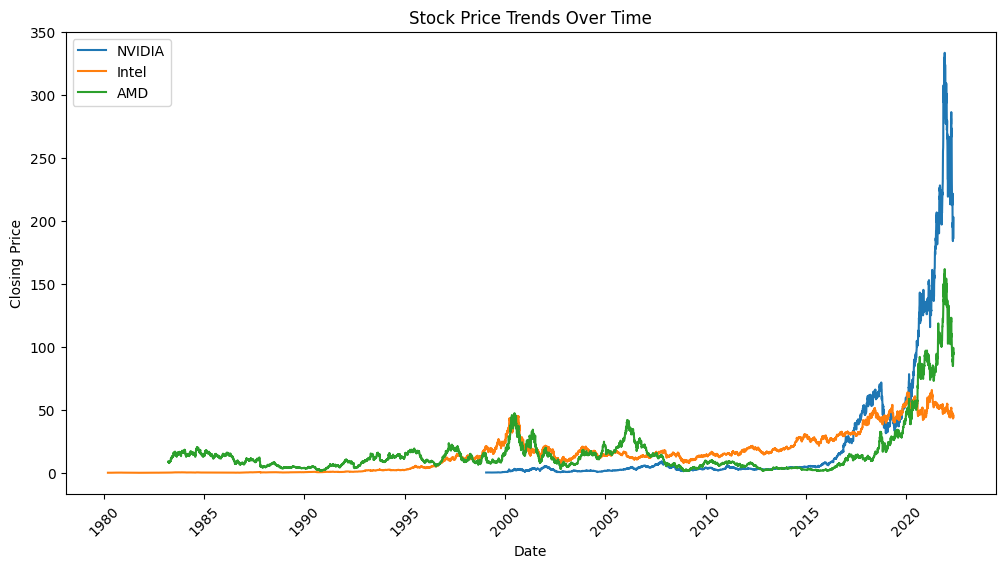

In [0]:
#EDA
import matplotlib.pyplot as plt

# Converting Spark DataFrames to Pandas for plotting
df_nvidia_pd = df_nvidia.toPandas()
df_intel_pd = df_intel.toPandas()
df_amd_pd = df_amd.toPandas()

# Ploting stock closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df_nvidia_pd["date"], df_nvidia_pd["close"], label="NVIDIA")
plt.plot(df_intel_pd["date"], df_intel_pd["close"], label="Intel")
plt.plot(df_amd_pd["date"], df_amd_pd["close"], label="AMD")

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


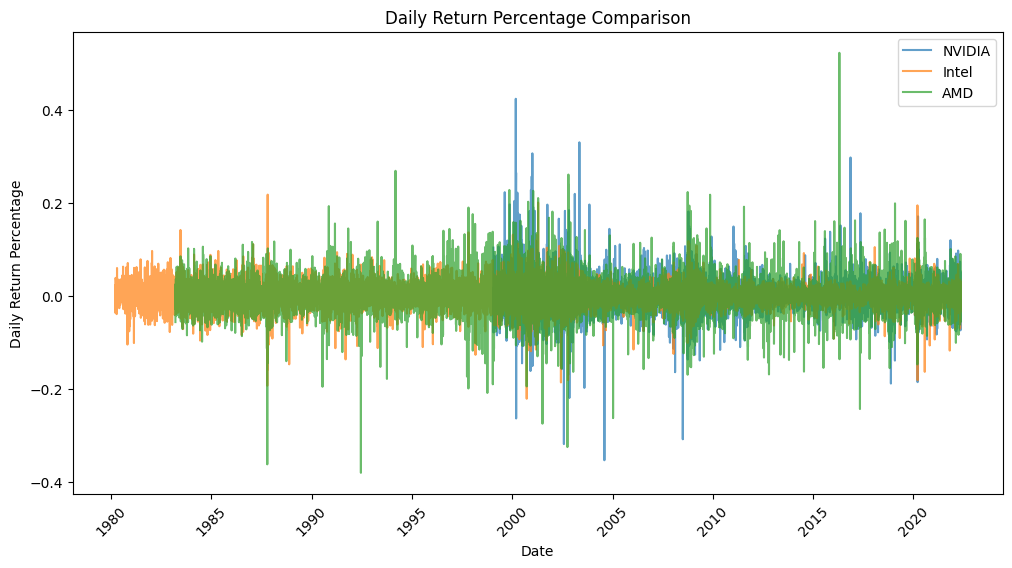

In [0]:
 # Daily Return Percentage Calculation
df_nvidia_pd["daily_return"] = df_nvidia_pd["close"].pct_change()
df_intel_pd["daily_return"] = df_intel_pd["close"].pct_change()
df_amd_pd["daily_return"] = df_amd_pd["close"].pct_change()

# Daily Return Percentage Plot
plt.figure(figsize=(12, 6))
plt.plot(df_nvidia_pd["date"], df_nvidia_pd["daily_return"], label="NVIDIA", alpha=0.7)
plt.plot(df_intel_pd["date"], df_intel_pd["daily_return"], label="Intel", alpha=0.7)
plt.plot(df_amd_pd["date"], df_amd_pd["daily_return"], label="AMD", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Daily Return Percentage")
plt.title("Daily Return Percentage Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [0]:
# Compute Overall Change in Stock Price
intel_price_change = ((df_intel_pd["close"].iloc[-1] - df_intel_pd["close"].iloc[0]) / df_intel_pd["close"].iloc[0]) * 100
nvidia_price_change = ((df_nvidia_pd["close"].iloc[-1] - df_nvidia_pd["close"].iloc[0]) / df_nvidia_pd["close"].iloc[0]) * 100
amd_price_change = ((df_amd_pd["close"].iloc[-1] - df_amd_pd["close"].iloc[0]) / df_amd_pd["close"].iloc[0]) * 100

In [0]:
import pandas as pd
# display Results in Databricks
stock_changes = pd.DataFrame({
    "Stock": ["Intel", "Nvidia", "AMD"],
    "Percentage Change (%)": [intel_price_change, nvidia_price_change, amd_price_change]
})

In [0]:
display(stock_changes)

Stock,Percentage Change (%)
Intel,22889.102231447843
Nvidia,49409.544008483565
AMD,959.6276743539871


In [0]:
df_nvidia_pd.head()


,date,open,high,low,close,volume,daily_return
0,1999-01-22,0.4023,0.4490,0.3569,0.3772,271468800,NaN
1,1999-01-25,0.4071,0.4214,0.3772,0.4166,51048000,0.104454
2,1999-01-26,0.4214,0.4299,0.3783,0.3843,34320000,-0.077532
3,1999-01-27,0.3856,0.3952,0.3640,0.3831,24436800,-0.003123
4,1999-01-28,0.3831,0.3856,0.3795,0.3820,22752000,-0.002871


In [0]:
df_amd_pd.head()


,date,open,high,low,close,volume,daily_return
0,1983-03-21,8.9675,9.0300,8.8101,8.9975,510800,NaN
1,1983-03-22,8.7176,8.9675,8.4977,8.4977,328000,-0.055549
2,1983-03-23,8.4977,8.8101,8.4677,8.7176,427200,0.025878
3,1983-03-24,8.7176,8.7801,8.6551,8.7801,393200,0.007169
4,1983-03-25,8.9051,9.0600,8.7476,8.8726,210400,0.010535


In [0]:
#tyhe percentages i am getting are way too high there is some issue .. not it is correct . due to ingation, amd other factors this grew naturally.
df_intel_pd.head()


,date,open,high,low,close,volume,daily_return
0,1980-03-17,0.1927,0.1958,0.1927,0.1927,10924800,NaN
1,1980-03-18,0.1927,0.1943,0.1912,0.1912,17068800,-0.007784
2,1980-03-19,0.1958,0.1989,0.1958,0.1958,18508800,0.024059
3,1980-03-20,0.1958,0.1981,0.1950,0.1950,11174400,-0.004086
4,1980-03-21,0.1912,0.1912,0.1881,0.1881,12172800,-0.035385


In [0]:


df_intel_pd.tail()

,date,open,high,low,close,volume,daily_return
10622,2022-05-02,43.3651,44.6248,43.1568,44.5950,45319549,0.031427
10623,2022-05-03,44.4264,45.1207,43.8710,44.6942,40031392,0.002224
10624,2022-05-04,44.6942,46.2614,44.0495,46.1622,44463333,0.032845
10625,2022-05-05,45.6000,45.9100,44.1300,44.6000,52887744,-0.033842
10626,2022-05-06,44.4900,45.1500,43.8400,44.3000,40525471,-0.006726


Model Performance:
Mean Absolute Error (MAE): 0.4985
Mean Squared Error (MSE): 1.2647
Model Accuracy (R² Score): 99.83%


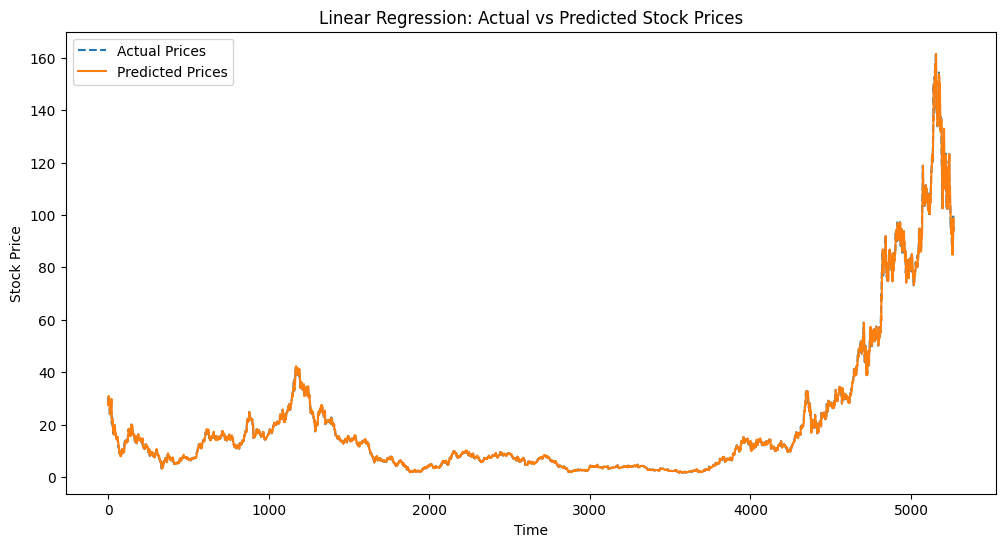

Actual,Predicted
28.9,27.460805481231695
28.37,28.66874502933807
30.28,28.26852600027739
31.1,30.106265589395463
30.05,30.920272931393892
29.67,30.09144524162034
29.28,29.776221159509365
27.44,29.44540492378852
27.56,27.673010417438896
26.4,27.661749322224967


In [0]:
# Import required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

#  Function to prepare stock data for regression
def prepare_stock_data(df):
    df["next_close"] = df["close"].shift(-1)  # Target variable: Next day's closing price

    # Moving Averages
    df["5_day_MA"] = df["close"].rolling(window=5).mean()
    df["10_day_MA"] = df["close"].rolling(window=10).mean()

    # Volatility (Standard Deviation of Returns)
    df["volatility"] = df["daily_return"].rolling(window=5).std()

    return df.dropna()  

df_nvidia_pd = prepare_stock_data(df_nvidia_pd)
df_intel_pd = prepare_stock_data(df_intel_pd)
df_amd_pd = prepare_stock_data(df_amd_pd)

df_combined = pd.concat([df_nvidia_pd, df_intel_pd, df_amd_pd], keys=["Nvidia", "Intel", "AMD"], names=["Stock"])

#  Defining features (X) and target (Y)
features = ["close", "5_day_MA", "10_day_MA", "volatility"]
X = df_combined[features]
y = df_combined["next_close"]

#  Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Training Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = lr_model.score(X_test, y_test) 

# Displaying results
print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Model Accuracy (R² Score): {r2_score * 100:.2f}%")  # Accuracy Percentage

#  Visualizing Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Linear Regression: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

#  Display prediction results in Databricks
display(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(20))


In [0]:
import numpy as np
import pandas as pd

# Manually created test values for prediction
test_close = 120.50  # Example current closing price
test_5_day_MA = 118.75  # Example 5-day moving average
test_10_day_MA = 117.40  # Example 10-day moving average
test_volatility = 0.015  # Example stock volatility

# Preparing the input data for prediction as a DataFrame with feature names
feature_names = ["close", "5_day_MA", "10_day_MA", "volatility"]
test_data = pd.DataFrame([[test_close, test_5_day_MA, test_10_day_MA, test_volatility]], columns=feature_names)

# Predict next day's stock price
predicted_price = lr_model.predict(test_data)[0]

# Determining if the stock price will go UP or DOWN
result = "YES" if predicted_price > test_close else "NO"

# Displaying the result
print(f"Predicted Next Day Price: {predicted_price:.2f}")
print(f"Will the stock go UP? {result}")


Predicted Next Day Price: 120.49
Will the stock go UP? NO


In [0]:
import numpy as np
import pandas as pd

# Function to predict stock price for a given company
def predict_stock_price(model, close_price, five_day_ma, ten_day_ma, volatility):
    feature_names = ["close", "5_day_MA", "10_day_MA", "volatility"]
    test_data = pd.DataFrame([[close_price, five_day_ma, ten_day_ma, volatility]], columns=feature_names)
    predicted_price = model.predict(test_data)[0]  # Predict next day's price
    return predicted_price

test_intel = [125.00, 124.50, 123.80, 0.015]  
test_nvidia = [430.00, 428.50, 425.60, 0.022]
test_amd = [90.50, 89.80, 88.90, 0.018]

# Predicting stock prices for each company
intel_pred = predict_stock_price(lr_model, *test_intel)
nvidia_pred = predict_stock_price(lr_model, *test_nvidia)
amd_pred = predict_stock_price(lr_model, *test_amd)

# Comparing results
predictions = {"Intel": intel_pred, "Nvidia": nvidia_pred, "AMD": amd_pred}
best_stock = max(predictions, key=predictions.get) 

# Displaying results
print(f"Predicted Next-Day Stock Prices:")
print(f"Intel: ${intel_pred:.2f}")
print(f"Nvidia: ${nvidia_pred:.2f}")
print(f"AMD: ${amd_pred:.2f}")

print(f"\nBest Investment Option: {best_stock}")


Predicted Next-Day Stock Prices:
Intel: $125.04
Nvidia: $430.17
AMD: $90.54

Best Investment Option: Nvidia
